# PREPROCESSING AND FEATURE ENGINEERING

In [1]:
import pandas as pd

df = pd.read_csv('Fashion_Retail_Sales.csv')
print(df.head())

   Customer Reference ID Item Purchased  Purchase Amount (USD) Date Purchase  \
0                   4018        Handbag                 4619.0    2023-02-05   
1                   4115          Tunic                 2456.0    2023-07-11   
2                   4019       Tank Top                 2102.0    2023-03-23   
3                   4097       Leggings                 3126.0    2023-03-15   
4                   3997         Wallet                 3003.0    2022-11-27   

   Review Rating Payment Method  
0            NaN    Credit Card  
1            2.0    Credit Card  
2            4.1           Cash  
3            3.2           Cash  
4            4.7           Cash  


In [1699]:
print(df.shape)

(3400, 6)


In [1700]:
print(df.nunique())

Customer Reference ID    166
Item Purchased            50
Purchase Amount (USD)    234
Date Purchase            365
Review Rating             41
Payment Method             2
dtype: int64


Check for missing values

In [1701]:
print(df.isnull().sum())

Customer Reference ID      0
Item Purchased             0
Purchase Amount (USD)    650
Date Purchase              0
Review Rating            324
Payment Method             0
dtype: int64


Making a new dataframe to determine if I need to eliminate the purchase with missing price based on the amount of missing prices for the certain item compared to the total amount of purchases of the item.

In [1702]:
total_purchases = df.groupby('Item Purchased').size()

missing_prices_count = df[df['Purchase Amount (USD)'].isnull()].groupby('Item Purchased').size()

result = pd.DataFrame({
    'total_purchases': total_purchases,
    'missing_prices_count': missing_prices_count
})

result = result.fillna(0)

print(result)


                total_purchases  missing_prices_count
Item Purchased                                       
Backpack                     71                    16
Belt                         90                    21
Blazer                       71                    17
Blouse                       73                    16
Boots                        65                    13
Bowtie                       52                     8
Camisole                     76                    14
Cardigan                     72                    11
Coat                         67                    15
Dress                        57                    13
Flannel Shirt                63                    10
Flip-Flops                   51                    10
Gloves                       59                     7
Handbag                      72                    13
Hat                          68                    12
Hoodie                       75                    13
Jacket                      

Checking the amount of missing prices is over third of the total purchases.

In [1703]:
result['missing_over_third'] = result['missing_prices_count'] > (result['total_purchases'] / 3)

print(result['missing_over_third'].sum())

0


No item category is missing the price for over third of the total purchases so now I will fill the NaN values with the median price of each Item Purchased.

In [1704]:
median_prices = df.groupby('Item Purchased')['Purchase Amount (USD)'].transform('median')

df['Purchase Amount (USD)'] = df['Purchase Amount (USD)'].fillna(median_prices)

print(df.isnull().sum())

Customer Reference ID      0
Item Purchased             0
Purchase Amount (USD)      0
Date Purchase              0
Review Rating            324
Payment Method             0
dtype: int64


I will do the same procedures for missing Review Ratings as for the missing prices.

In [1705]:
missing_review_count = df[df['Review Rating'].isnull()].groupby('Item Purchased').size()

result['missing reviews'] = missing_review_count

result.fillna(0)

print(result.head())

                total_purchases  missing_prices_count  missing_over_third  \
Item Purchased                                                              
Backpack                     71                    16               False   
Belt                         90                    21               False   
Blazer                       71                    17               False   
Blouse                       73                    16               False   
Boots                        65                    13               False   

                missing reviews  
Item Purchased                   
Backpack                      5  
Belt                          6  
Blazer                        6  
Blouse                       10  
Boots                         7  


In [1706]:
result['missing_over_third_review'] = result['missing reviews'] > (result['total_purchases'] / 3)

print(result['missing_over_third_review'].sum())

0


In [1707]:
median_reviews = df.groupby('Item Purchased')['Review Rating'].transform('median')

df['Review Rating'] = df['Review Rating'].fillna(median_reviews)

print(df.isnull().sum())

Customer Reference ID    0
Item Purchased           0
Purchase Amount (USD)    0
Date Purchase            0
Review Rating            0
Payment Method           0
dtype: int64


Categorising products into 5 different groups.

In [1708]:
unique_items = df['Item Purchased'].unique()
print(f"Unique values in '{'Item Purchased'}': {unique_items}")

Unique values in 'Item Purchased': ['Handbag' 'Tunic' 'Tank Top' 'Leggings' 'Wallet' 'Onesie' 'Jacket'
 'Trousers' 'Jeans' 'Loafers' 'Slippers' 'Bowtie' 'Pajamas' 'Trench Coat'
 'Poncho' 'Gloves' 'Romper' 'T-shirt' 'Flip-Flops' 'Shorts' 'Blazer'
 'Boots' 'Belt' 'Hoodie' 'Sweater' 'Blouse' 'Swimsuit' 'Kimono' 'Cardigan'
 'Socks' 'Pants' 'Scarf' 'Backpack' 'Dress' 'Camisole' 'Sneakers'
 'Flannel Shirt' 'Tie' 'Polo Shirt' 'Umbrella' 'Hat' 'Sun Hat' 'Overalls'
 'Coat' 'Sunglasses' 'Vest' 'Sandals' 'Jumpsuit' 'Raincoat' 'Skirt']


In [ ]:
categories = {
    'Upper Body': ['Tunic', 'Tank Top', 'Jacket', 'T-shirt', 'Blazer', 'Hoodie', 'Sweater', 'Blouse', 'Kimono', 'Cardigan', 'Flannel Shirt', 'Tie', 'Polo Shirt', 'Vest'],
    'Lower Body': ['Leggings', 'Trousers', 'Jeans', 'Shorts', 'Pants', 'Skirt'],
    'Full Body': ['Onesie', 'Pajamas', 'Romper', 'Dress', 'Camisole', 'Overalls', 'Jumpsuit', 'Coat', 'Swimsuit', 'Trench Coat', 'Poncho', 'Raincoat'],
    'Footwear': ['Loafers', 'Slippers', 'Flip-Flops', 'Boots', 'Sneakers', 'Sandals'],
    'Accessories': ['Handbag', 'Wallet', 'Bowtie', 'Gloves', 'Scarf', 'Backpack', 'Belt', 'Umbrella', 'Hat', 'Sun Hat', 'Sunglasses', 'Socks']
}

categorized_items = [item for sublist in categories.values() for item in sublist]

uncategorized_items = set(unique_items) - set(categorized_items)

print("Uncategorized items:", uncategorized_items)

Uncategorized items: set()


In [1710]:
item_to_category = {item: category for category, items in categories.items() for item in items}

df['Item Category'] = df['Item Purchased'].map(item_to_category)

print(df.head())

   Customer Reference ID Item Purchased  Purchase Amount (USD) Date Purchase  \
0                   4018        Handbag                 4619.0    2023-02-05   
1                   4115          Tunic                 2456.0    2023-07-11   
2                   4019       Tank Top                 2102.0    2023-03-23   
3                   4097       Leggings                 3126.0    2023-03-15   
4                   3997         Wallet                 3003.0    2022-11-27   

   Review Rating Payment Method Item Category  
0            3.2    Credit Card   Accessories  
1            2.0    Credit Card    Upper Body  
2            4.1           Cash    Upper Body  
3            3.2           Cash    Lower Body  
4            4.7           Cash   Accessories  


In [ ]:
category_counts = df['Item Category'].value_counts()

print("Category counts:")
print(category_counts)

Category counts:
Item Category
Upper Body     965
Accessories    811
Full Body      810
Lower Body     439
Footwear       375
Name: count, dtype: int64


In [1712]:
df = df.drop(columns=['Item Purchased'])

Label encoding  item purchased and payment method.

In [1713]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Item Category'] = label_encoder.fit_transform(df['Item Category'])

df['Payment Method'] = label_encoder.fit_transform(df['Payment Method'])

print(df.head())


   Customer Reference ID  Purchase Amount (USD) Date Purchase  Review Rating  \
0                   4018                 4619.0    2023-02-05            3.2   
1                   4115                 2456.0    2023-07-11            2.0   
2                   4019                 2102.0    2023-03-23            4.1   
3                   4097                 3126.0    2023-03-15            3.2   
4                   3997                 3003.0    2022-11-27            4.7   

   Payment Method  Item Category  
0               1              0  
1               1              4  
2               0              4  
3               0              3  
4               0              0  


Check that all the ratings are between 0 and 5

In [1714]:
is_within_range = df['Review Rating'].between(0, 5).all()

if is_within_range:
    print("All review ratings are between 0 and 5.")
else:
    print("Some review ratings are outside the range of 0 to 5.")

All review ratings are between 0 and 5.


In [1715]:
df['Date Purchase'] = pd.to_datetime(df['Date Purchase'])

In [1716]:
print(df.dtypes)

Customer Reference ID             int64
Purchase Amount (USD)           float64
Date Purchase            datetime64[ns]
Review Rating                   float64
Payment Method                    int64
Item Category                     int64
dtype: object


Aggregating the dataset so we have information about each customer.

In [ ]:
customer_data = df.groupby('Customer Reference ID').agg({
    'Purchase Amount (USD)': 'sum',  # Total spending
    'Item Category': lambda x: x.mode()[0],  # Most purchased item category
    'Date Purchase': ['min', 'max'],  # First and last purchase datetime for frequency calculation
    'Payment Method': lambda x: x.mode()[0],  # Most frequent payment method,
    'Review Rating': 'mean', # Average review rating
    'Customer Reference ID': 'count'  # Number of purchases
}).reset_index()

customer_data.columns = ['customer ID', 'total_spending', 'most_purchased_category', 'first_purchase', 'last_purchase', 'preferred_payment_method', 'average_rating', 'num_purchases']

customer_data['buying_frequency'] = customer_data['num_purchases'] / (customer_data['last_purchase'] - customer_data['first_purchase']).dt.days

customer_data['avg_purchase_cost'] = customer_data['total_spending'] / customer_data['num_purchases']

customer_data = customer_data.drop(columns=['first_purchase', 'last_purchase', 'total_spending', 'num_purchases'])

print(customer_data.head())


   customer ID  most_purchased_category  preferred_payment_method  \
0         3957                        4                         0   
1         3958                        2                         0   
2         3959                        0                         1   
3         3960                        2                         0   
4         3961                        0                         1   

   average_rating  buying_frequency  avg_purchase_cost  
0        3.221429          0.050360         107.642857  
1        2.720000          0.061728          84.300000  
2        2.950000          0.072131         106.931818  
3        3.063889          0.056604          95.138889  
4        2.727273          0.067485         105.954545  


In [1718]:
customer_data = customer_data.drop(columns=['customer ID'])

# EDA

In [1719]:
print(customer_data.describe())

       most_purchased_category  preferred_payment_method  average_rating  \
count               166.000000                166.000000      166.000000   
mean                  2.186747                  0.524096        3.007832   
std                   1.679125                  0.500930        0.247724   
min                   0.000000                  0.000000        2.353846   
25%                   0.000000                  0.000000        2.848251   
50%                   2.000000                  1.000000        3.001389   
75%                   4.000000                  1.000000        3.145479   
max                   4.000000                  1.000000        3.673529   

       buying_frequency  avg_purchase_cost  
count        166.000000         166.000000  
mean           0.061955         147.375678  
std            0.012169          83.808905  
min            0.033557          76.647059  
25%            0.052780         101.583333  
50%            0.061929         111.336364  


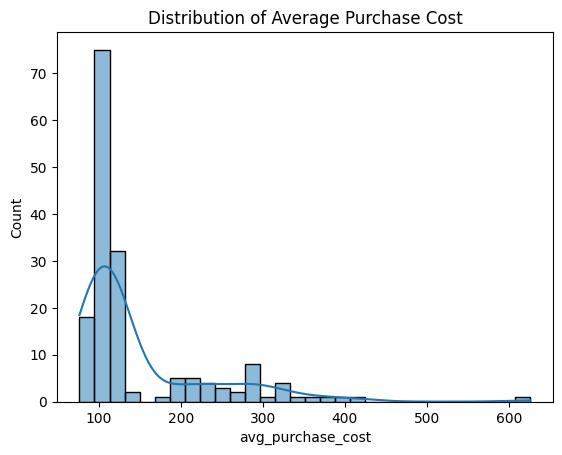

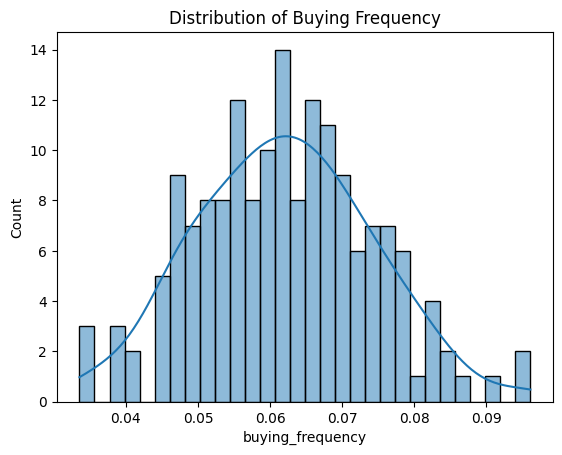

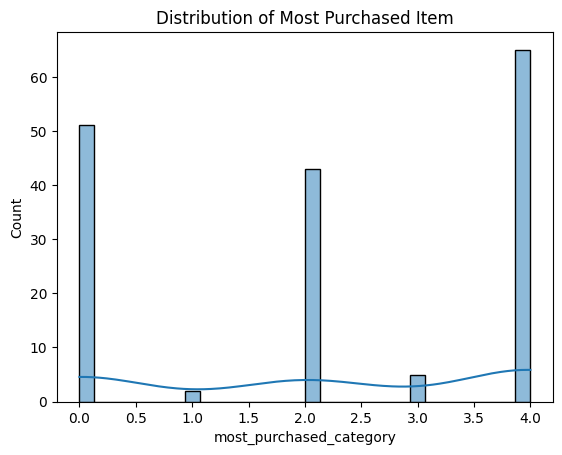

In [1720]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(customer_data['avg_purchase_cost'], kde=True, bins=30)
plt.title('Distribution of Average Purchase Cost')
plt.show()

sns.histplot(customer_data['buying_frequency'], kde=True, bins=30)
plt.title('Distribution of Buying Frequency')
plt.show()

sns.histplot(customer_data['most_purchased_category'], kde=True, bins=30)
plt.title('Distribution of Most Purchased Item')
plt.show()

From the average Purchase cost plot we can determin that most people around 100 USD per product. We can see multiple cases were people spend between 200 and 400 dollars per product and then the is a clear outlier around 600 USD. Buying frequency is very evenly distributed. The most popular item category is clearly accessories and then upper body items. Most customers most purchased category is accessories, then upper body and then full body. Footwear or lower body clothes are barely any clients most purchased categpry. I will drop buying frequency as the values of buying frequency are fairly close to each other and the feature did not contribute effectively in clustering when I tried.

In [1721]:
customer_data = customer_data.drop(columns=['buying_frequency'])

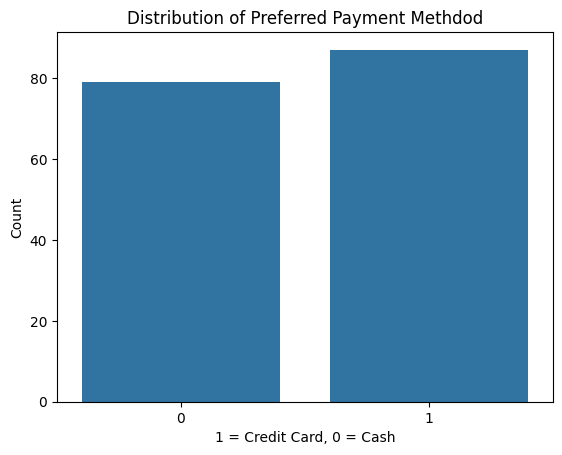

In [1722]:
sns.countplot(x='preferred_payment_method', data=customer_data)
plt.title('Distribution of Preferred Payment Methdod')
plt.xlabel('1 = Credit Card, 0 = Cash')
plt.ylabel('Count')
plt.show()

Overall, the customers prefer to pay with credit car slighlty more than with cash.

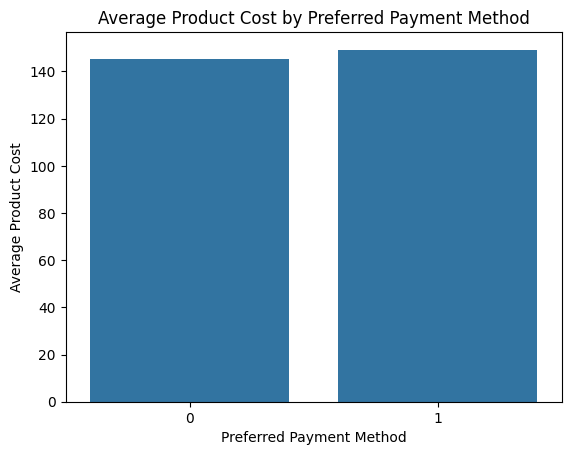

In [1723]:
# Group by preferred_payment_method and calculate the mean of average_product_cost
payment_avg_cost = customer_data.groupby('preferred_payment_method')['avg_purchase_cost'].mean().reset_index()

# Bar plot
sns.barplot(x='preferred_payment_method', y='avg_purchase_cost', data=payment_avg_cost)
plt.title('Average Product Cost by Preferred Payment Method')
plt.xlabel('Preferred Payment Method')
plt.ylabel('Average Product Cost')
plt.show()

The average price for a product by preferred payment method is roughly the same.

/var/folders/42/481k8kj95w7cmh3m0mxvq4dw0000gn/T/ipykernel_22020/3075460457.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='preferred_payment_method', y='count', data=top_25_df, palette='Blues')


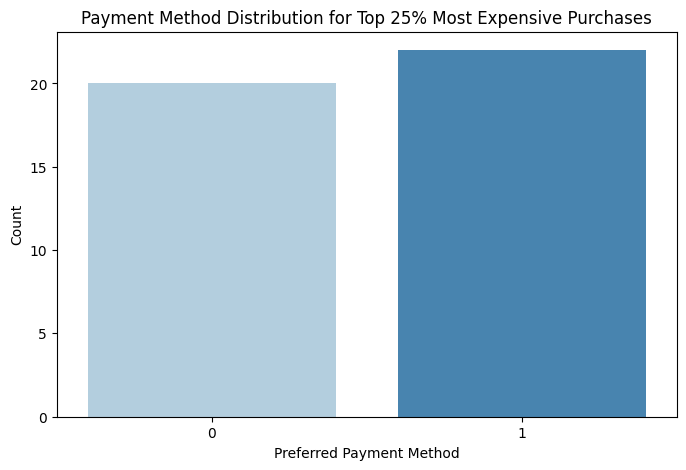

/var/folders/42/481k8kj95w7cmh3m0mxvq4dw0000gn/T/ipykernel_22020/3075460457.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='preferred_payment_method', y='count', data=bottom_25_df, palette='Greens')


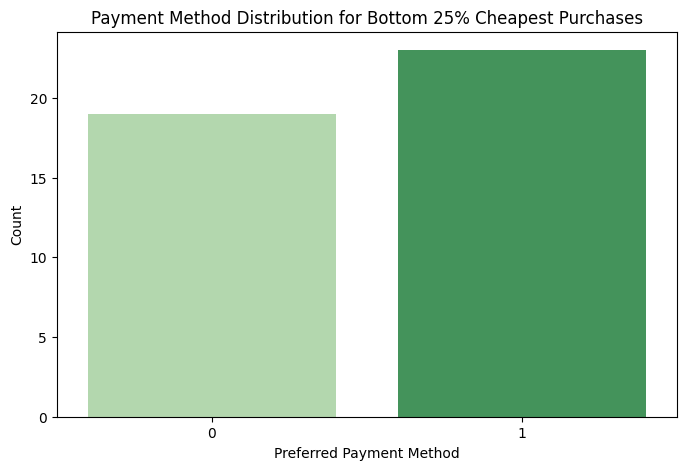

In [1724]:
# Calculate 25th and 75th percentiles
price_25th = customer_data['avg_purchase_cost'].quantile(0.25)
price_75th = customer_data['avg_purchase_cost'].quantile(0.75)

# Filter for top 25% and bottom 25%
top_25 = customer_data[customer_data['avg_purchase_cost'] >= price_75th]
bottom_25 = customer_data[customer_data['avg_purchase_cost'] <= price_25th]

# Count payment methods
top_25_counts = top_25['preferred_payment_method'].value_counts().reindex([0, 1], fill_value=0)
bottom_25_counts = bottom_25['preferred_payment_method'].value_counts().reindex([0, 1], fill_value=0)

# Convert to DataFrames for plotting
top_25_df = top_25_counts.reset_index()
top_25_df.columns = ['preferred_payment_method', 'count']

bottom_25_df = bottom_25_counts.reset_index()
bottom_25_df.columns = ['preferred_payment_method', 'count']

# Plot for top 25%
plt.figure(figsize=(8, 5))
sns.barplot(x='preferred_payment_method', y='count', data=top_25_df, palette='Blues')
plt.title('Payment Method Distribution for Top 25% Most Expensive Purchases')
plt.xlabel('Preferred Payment Method')
plt.ylabel('Count')
plt.show()

# Plot for bottom 25%
plt.figure(figsize=(8, 5))
sns.barplot(x='preferred_payment_method', y='count', data=bottom_25_df, palette='Greens')
plt.title('Payment Method Distribution for Bottom 25% Cheapest Purchases')
plt.xlabel('Preferred Payment Method')
plt.ylabel('Count')
plt.show()

In both cases customers prefer to use credit card more but with the bottom 25% cheapest purchases the difference between the usage of payment methods is slightly larger. Even though I can't find variance between preferred payment methdo and average purchase cost, there might be underlying patterns with preferred payment method and other features.

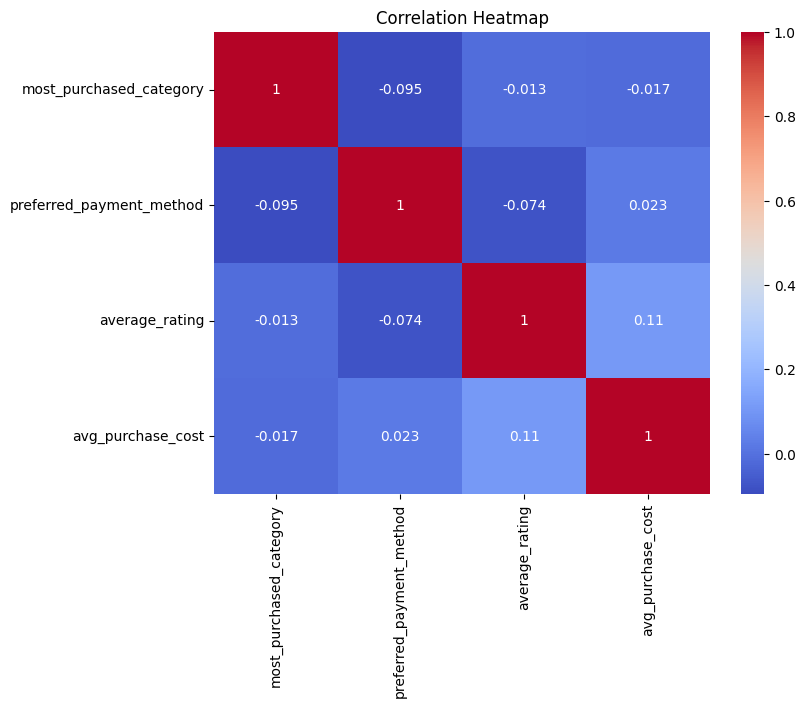

In [1725]:
plt.figure(figsize=(8, 6))
sns.heatmap(customer_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

None of the featues correlate enough to drop one.

# Choosing the amount of clusters, PCA components and training the model

Scaling the features

In [1726]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data.values)
scaled_df = pd.DataFrame(scaled_data, index=customer_data.index, columns=customer_data.columns)
print(scaled_df.head())

   most_purchased_category  preferred_payment_method  average_rating  \
0                 1.083147                 -1.049412        0.864846   
1                -0.111553                 -1.049412       -1.165418   
2                -1.306254                  0.952914       -0.234157   
3                -0.111553                 -1.049412        0.226974   
4                -1.306254                  0.952914       -1.135971   

   avg_purchase_cost  
0          -0.475523  
1          -0.754890  
2          -0.484032  
3          -0.625170  
4          -0.495728  


Determining the amount of clusters with the elbow method.

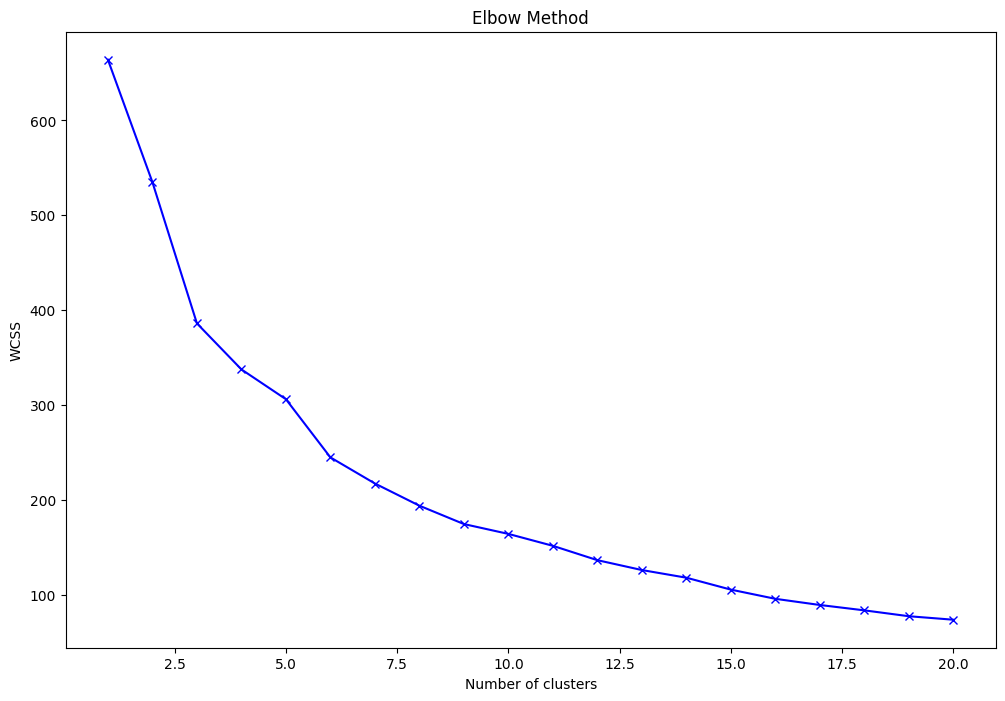

In [1727]:
from sklearn.cluster import KMeans

wcss=[]

for i in range (1,21):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,8))
plt.plot(range(1,21),wcss, 'bx-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Based on the elbow methdod, the right amount of clusters is 3.

Determining the amount of clusters with silhouette score.

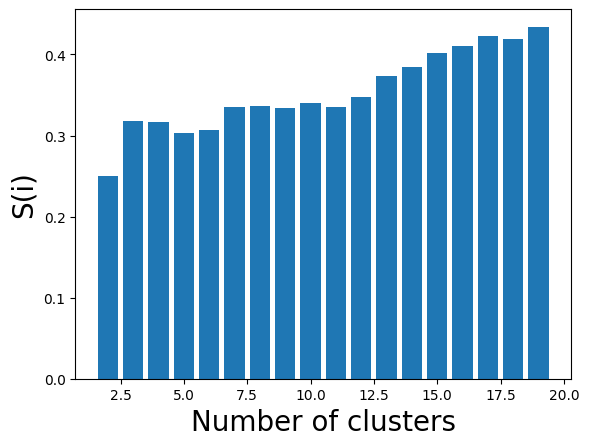

In [1728]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
for i in range(2,20):
    m1 = KMeans(n_clusters=i, max_iter=500,random_state=42)
    c = m1.fit_predict(scaled_df)
    silhouette_scores.append(silhouette_score(scaled_df,
    m1.fit_predict(scaled_df)))

plt.bar(range(2,20), silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

In [1729]:
sc = max(silhouette_scores)
number_of_clusters = silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  19


The silhoutte score suggest 19 different cllusters which is way too many for roughly 160 customers so I am sticking with 3 based on the elbow method.

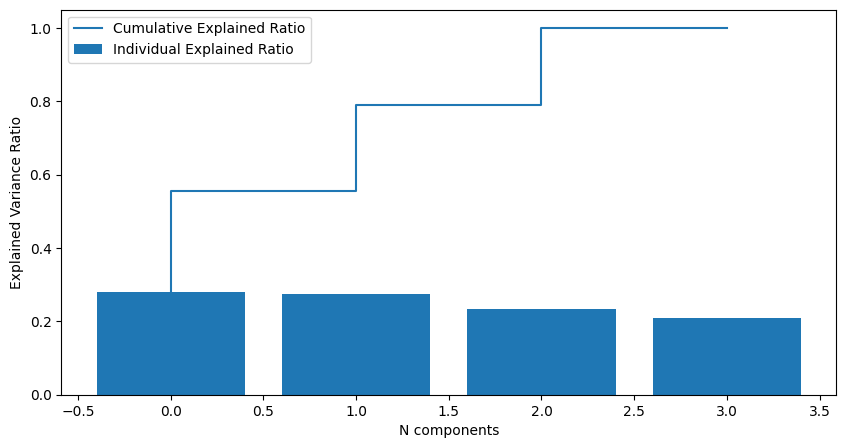

In [1730]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
pca.fit(scaled_df)
cum_sum_eigenvalues = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10,5))
plt.bar(range(0, len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, label="Individual Explained Ratio")
plt.step(range(0, len(cum_sum_eigenvalues)), cum_sum_eigenvalues, label="Cumulative Explained Ratio")
plt.xlabel("N components")
plt.ylabel("Explained Variance Ratio")
plt.legend(loc="best")
plt.show()

Based on the graph, I will use 2 PCA components for clustering.

In [1731]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_df)

pca_df = pd.DataFrame(reduced_data, columns=['PCA1', 'PCA2'])

In [1732]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(reduced_data)

# Add cluster labels to the DataFrame
pca_df['cluster'] = clusters
customer_data['cluster'] = clusters


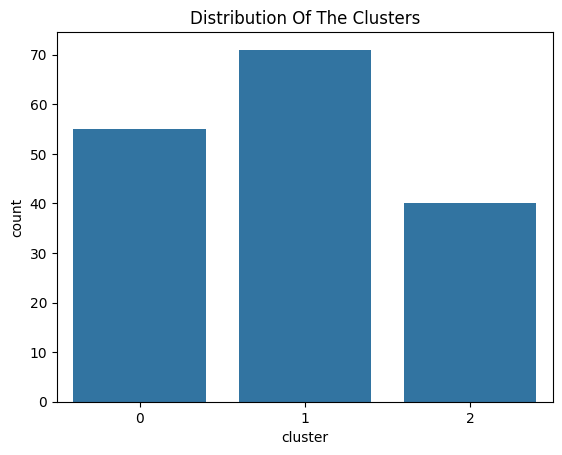

In [1733]:
pl = sns.countplot(x=pca_df["cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

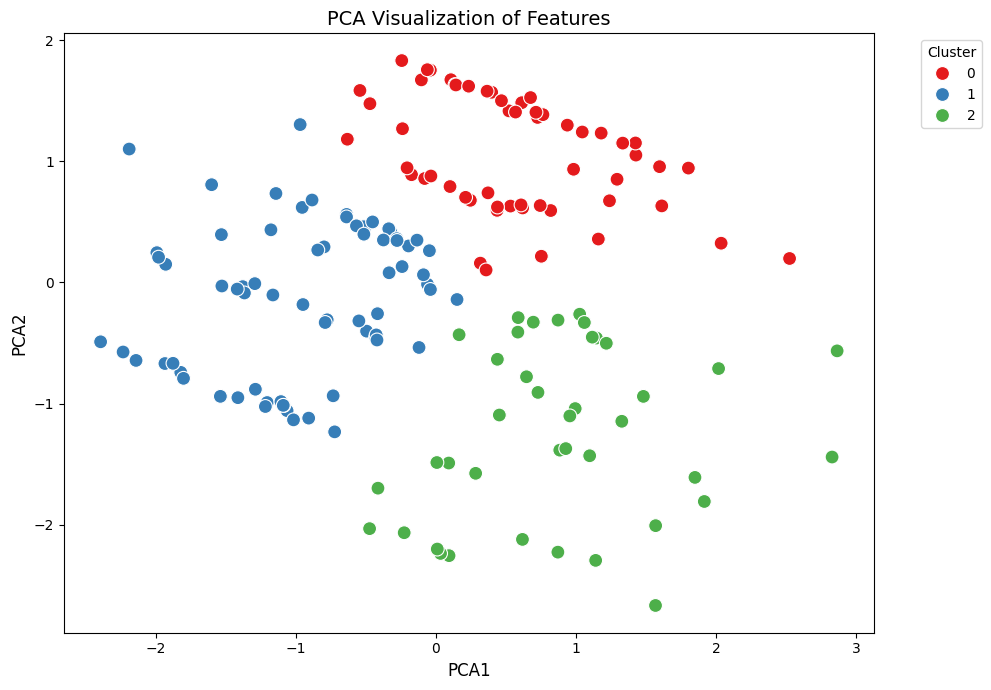

In [1734]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=pca_df, palette='Set1', s=100)
plt.title('PCA Visualization of Features', fontsize=14)
plt.xlabel('PCA1', fontsize=12)
plt.ylabel('PCA2', fontsize=12)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


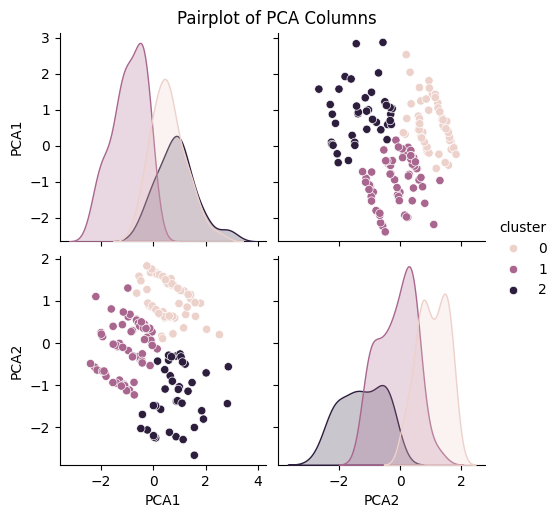

In [1735]:
sns.pairplot(data=pca_df, vars=['PCA1', 'PCA2'], hue='cluster')
plt.suptitle("Pairplot of PCA Columns", y=1.02)
plt.show()

From the plots above, we can conclude that the three clusters are distinctive with unique traits. The clusters are clearly separated which represent three different types of customers.

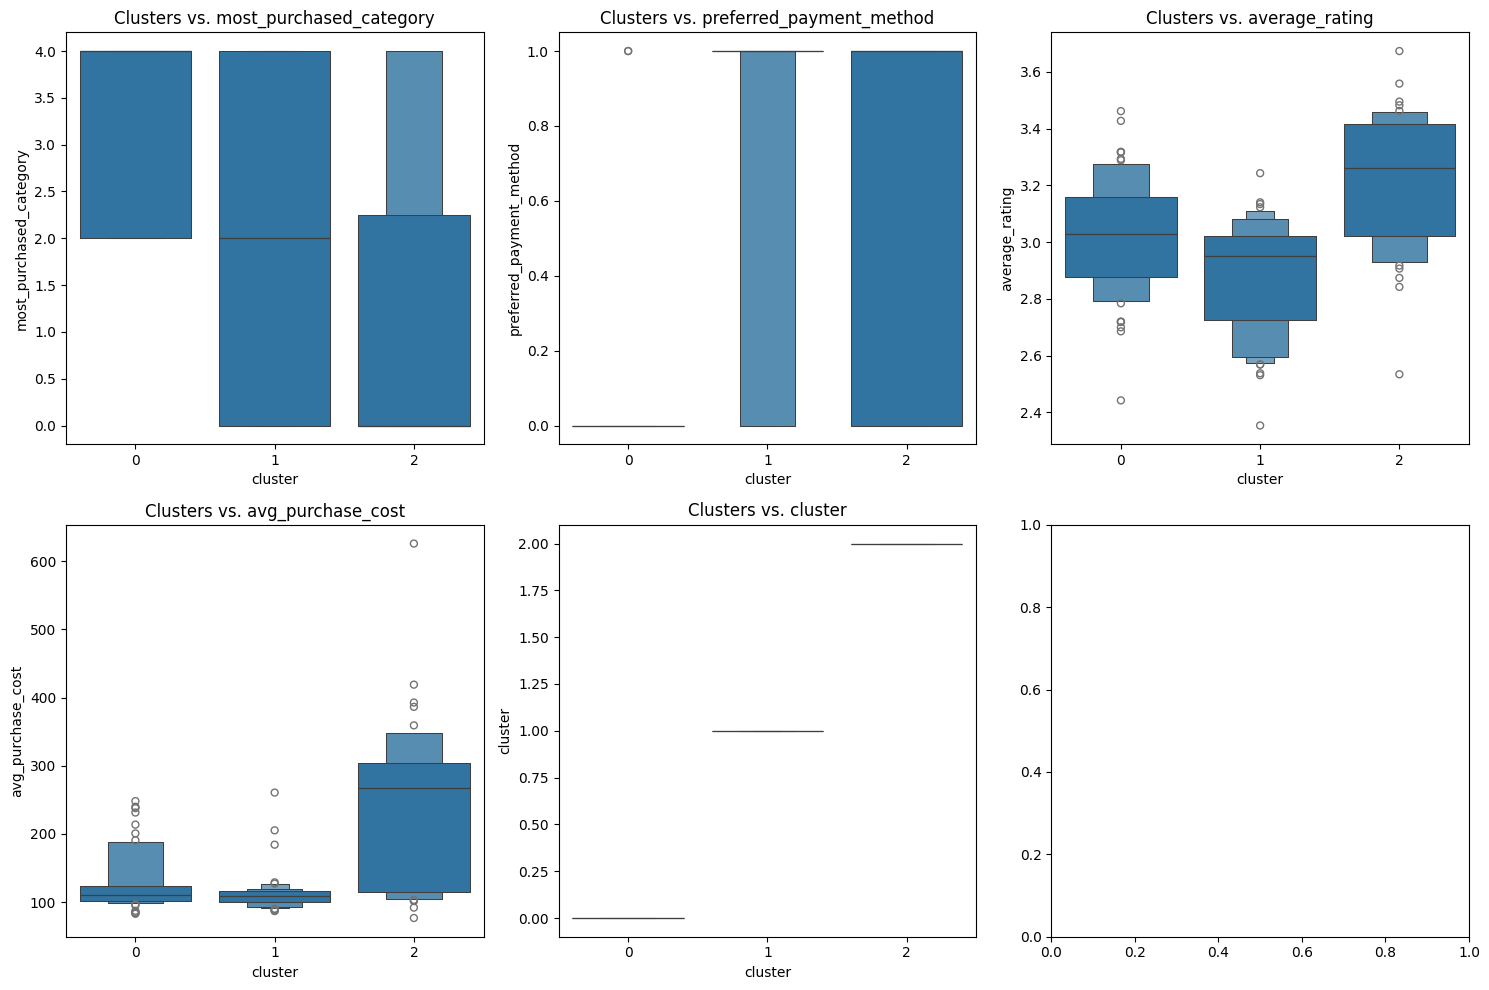

In [1736]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, column in enumerate(customer_data):
    row = i // 3
    col = i % 3  
    sns.boxenplot(x=customer_data["cluster"], y=customer_data[column], ax=axes[row, col])
    axes[row, col].set_title(f'Clusters vs. {column}')

plt.tight_layout() 
plt.show()

Analyzing the plot above we can describe the key characteristics of each cluster. Customers in cluster 0 are buying products from full body, footwear and accessories categories. For their most popular categories, the customers pay exclusively with cash except for one outlier who pays with a credit card. They tend to buy products that are a bit over 100 USD on average with some variation until around 200 USD. These customers also tend to be relatively happy with their products with the mean rating for the products they bought is jut over 3 out of 5.

Cluster 1 is the largest cluster where the customers buy products very evenly from all categories while strongly preferring credit card but with some variaton with cash users. They buy very exclusively products that are on average 100 USD with minimal variation. In this cluster the users give the lowest ratings for the products they buy. 

Customers in cluster 2 also buy from all categories but with a preference for tops, bottoms and full body items. They exclusively use credit cards and they buy the most expensive products on average. The mean of the average cost is close to 300 USD. The average price varies the most in cluster 2 but they clearly buy the most expensive products. In this cluster, the customers are the most satisfied with their products as the mean of the rating is around 3.3.

In conclusion, cluster 0 represents full body, footwear and accesory buyers who pay with cash and spend a little over 100 USD on a product on average. Cluster 1 represents credit card users through all product categories while spending the least on average and being the least satisfied with the products. Cluster 2 represents high-end product buyers using credit card and being the happiest with their products.